In [1]:
from keras.datasets import cifar10
from keras.utils  import np_utils
from PIL import Image

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dropout,Activation,Conv2D,GlobalAveragePooling2D
from keras.optimizers import SGD

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [5]:
print("Shape of Training Images :",X_train.shape)
print("Shape of Testing Images :",X_test.shape)

Shape of Training Images : (50000, 32, 32, 3)
Shape of Testing Images : (10000, 32, 32, 3)


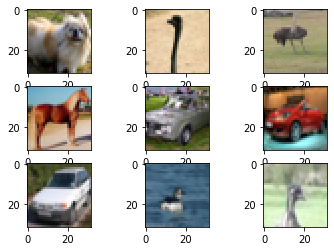

In [6]:
# Check out the images
for i in range(9):
    plt.subplot(330+1+i)
    img = X_train[40+i]
    plt.imshow(img)
plt.show()

In [7]:
# Preprocess data
# fix random seed for reproducibility
seed =6
np.random.seed(seed)

# load data
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
 
# Normalize inputs
print(X_train.astype,X_test.astype)
X_train= X_train.astype("float32")
X_test=X_test.astype("float32")
print(X_train.astype,X_test.astype)

X_train=X_train/255.0
X_test=X_test/255.0

<built-in method astype of numpy.ndarray object at 0x000001AAF95EA4E0> <built-in method astype of numpy.ndarray object at 0x000001AAF95EA030>
<built-in method astype of numpy.ndarray object at 0x000001AAEA0A91C0> <built-in method astype of numpy.ndarray object at 0x000001AAF9630A80>


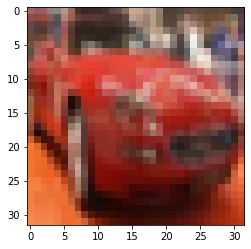

In [8]:
#print(X_train[0])
plt.imshow(X_train[5])
plt.show()

# Hot Encode Vectors

In [9]:
# OneHotVector 

# hot encode output

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

print(y_train[5])

(50000, 10)
(10000, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


# All CNN

In [10]:
def conf(weights=None):
    model=Sequential()
    model.add(Conv2D(96,(3,3),padding='same',input_shape=(32, 32, 3)))
    model.add(Activation("relu"))
    model.add(Conv2D(96,(3,3),padding='same'))
    model.add(Activation("relu"))
    model.add(Conv2D(96,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation("relu"))
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation("relu"))
    model.add(Conv2D(192,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation("relu"))
    model.add(Conv2D(192,(1,1),padding='valid'))
    model.add(Activation("relu"))
    model.add(Conv2D(10,(1,1),padding='valid'))
    
    
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    if weights:
        model.load_weights(weights)
    
    return model

In [11]:
learning_rate=0.01
weight_rate=1e-6
momentum= 0.9

# Build Model
model=conf()

# define optimizer

sgd= SGD(lr=learning_rate,decay=weight_rate,momentum=momentum,nesterov=True)
model.compile(loss="categorical_crossentropy",optimizer=sgd,metrics=['accuracy'])

# model summary
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)  

In [ ]:
"""epochs= 350
batch_size=32
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size,verbose=1)"""

# Load Weights as no GPU

In [12]:
learning_rate=0.01
weight_rate=1e-6
momentum= 0.9

# Build Model
weights="all_cnn_weights_0.9088_0.4994.hdf5"
model=conf(weights)

# define optimizer

sgd= SGD(lr=learning_rate,decay=weight_rate,momentum=momentum,nesterov=True)
model.compile(loss="categorical_crossentropy",optimizer=sgd,metrics=['accuracy'])

# model summary
print(model.summary())

scores= model.evaluate(X_test,y_test,verbose=1)
print("Accuracy : {} ",format(scores[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 192)       166080    
__________

In [13]:
classes= range(0,10)

list_index=['airplane',
      'cat',
      'bird',
      'automobile',
      'deer',
      'frog',
      'dog',
      'horse',
      'truck',
      'ship']

class_labels=dict(zip(classes,list_index))
print(class_labels)

{0: 'airplane', 1: 'cat', 2: 'bird', 3: 'automobile', 4: 'deer', 5: 'frog', 6: 'dog', 7: 'horse', 8: 'truck', 9: 'ship'}


In [14]:
# Generate batch size
batch = X_test[150:159]
labels=np.argmax(y_test[150:159],axis= -1)

# The predictions
preds=model.predict(batch,verbose=1)

9/9 [==============================] - 0s 25ms/step


In [15]:
preds

array([[2.0787225e-09, 2.3202842e-12, 2.7908171e-12, 2.6167391e-12,
        5.0829471e-14, 1.6180484e-14, 2.5795079e-09, 1.3272910e-19,
        1.0000000e+00, 4.2793418e-17],
       [2.2764392e-12, 2.9542035e-04, 1.1233316e-11, 1.0649329e-12,
        5.9223394e-13, 1.5458948e-14, 1.3961181e-13, 6.0878574e-10,
        6.0796783e-13, 9.9970454e-01],
       [3.2084385e-10, 1.1557208e-12, 4.2319616e-08, 3.2907579e-04,
        4.2354236e-09, 9.6776788e-11, 9.9967086e-01, 1.1048566e-14,
        1.1722981e-09, 1.8152000e-12],
       [1.0000000e+00, 6.0933147e-18, 1.3000796e-13, 3.1114864e-09,
        1.7305015e-17, 3.9541284e-14, 3.0107306e-18, 9.5124346e-11,
        4.1432344e-18, 9.9476470e-16],
       [9.9997759e-01, 1.7657230e-11, 1.1177785e-05, 5.1127742e-09,
        2.5804503e-08, 2.6864277e-09, 3.5503146e-07, 3.0977601e-10,
        1.0803733e-05, 4.7327933e-09],
       [6.0329697e-26, 4.1304846e-25, 2.8294290e-12, 4.0874315e-08,
        2.2914230e-17, 1.0000000e+00, 8.3176372e-14, 3.02

In [16]:
# these are class probabilites 
class_result=np.argmax(preds,axis= -1)
print(class_result)

[8 9 6 0 0 5 2 9 5]


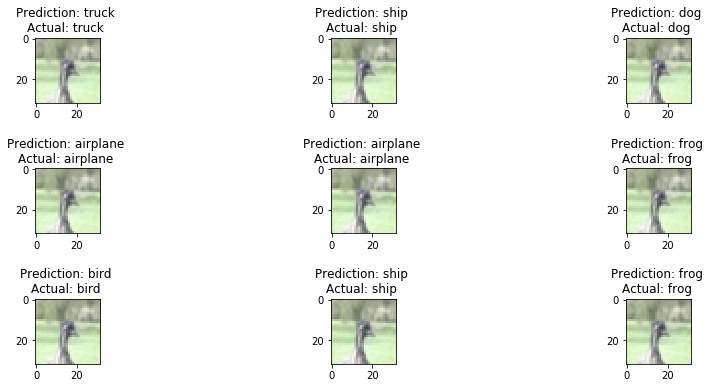

In [17]:
# Plotting the Images

fig,ax = plt.subplots(3,3,figsize= (15,6))
fig.subplots_adjust(hspace=1)
ax= ax.flatten()

for i,image in enumerate(batch):
    # determine label and key for each image
    for key,label in class_labels.items():
        if class_result[i]==key:
            title="Prediction: {} \nActual: {} ".format(class_labels[key],class_labels[labels[i]])
            ax[i].set_title(title)
            
    ax[i].imshow(img)
    
    
plt.show()
            